In [ ]:
# import csv
# import os
# for i in range(12,1200):
#     fname = os.path.join('New_Dataset',str(i)+'.csv')
#     with open(fname,'w',newline='') as file:
#         writer = csv.writer(file)
#         writer.writerow(["Image","Annotations"])

In [ ]:
def add_on_csv(idx,Image,GTname):
    for i in idx:
        fname = os.path.join('New_Dataset',str(i)+'.csv')
        with open(fname,'a+',newline='') as file:
            writer = csv.writer(file)
            writer.writerow([Image,GTname])

In [ ]:
from __future__ import print_function, division
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms, utils
from PIL import Image
import torchvision.transforms.functional as TF

In [ ]:
concepts = ["color","object","part","material","scene","texture"]

class conceptLoader(Dataset):
    """Broaden Dataset Image Loader"""
    
    def __init__(self, root_dir):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            conceptType (string): type of the concept to load.
        """
        self.c_flag = False  # Concept Flag
        csv_file = os.path.join(root_dir,"index.csv") 
        root_dir = os.path.join(root_dir,"images") 
        self.fileNames = pd.read_csv(csv_file)
        self.root_dir = root_dir

    def __len__(self):
        return len(self.fileNames)
    

    def load_concept(self,idx,conceptType):
        c_index = str(self.fileNames.iloc[idx, concepts.index(conceptType)+6])
        image_name = str(self.fileNames.iloc[idx, 0])
        if c_index=='nan':
            self.c_flag = False
            # sample = torch.zeros([1, 113, 113])
            sample =0
        else:
            self.c_flag = True
            if conceptType =="scene" or conceptType =="texture":
                sample  = c_index.split(";") 
            elif conceptType =="part":
                items  = c_index.split(";") 
                sample = []
                c_index=[]
                for i in items:
                    img_name = os.path.join(self.root_dir,i)
                    image = Image.open(img_name)
                    px = np.array(image)
                    item = self.decodeClassMask(px)
                    sample.append(item)
                    c_index.append(i)
                
            else:
                img_name = os.path.join(self.root_dir,c_index)
                image = Image.open(img_name)
                px = np.array(image)
                sample = self.decodeClassMask(px)
                #sample = Image.fromarray(sample)
                #sample = TF.to_tensor(sample)     

        # sample.unsqueeze_(0)
        return self.c_flag, sample,image_name,c_index

    def decodeClassMask(self,im):
        ''' Decodes pixel-level object/part class and instance data from
        the given image, previously encoded into RGB channels.'''
    # Classes are a combination of RG channels
        return (im[:,:,0] + (im[:,:,1])*256)



In [ ]:
    dataset_path='./broden1_227'
    # data_obj = imageLoader(dataset_path)
    data_obj = conceptLoader(dataset_path)
    for j in range(63305):
        flag,aa,ImgName, ConName = data_obj.load_concept(j,"material")
        print(j)
        if flag:
            k=np.unique(aa)
            add_on_csv(k,ImgName,ConName)

In [ ]:
    dataset_path='./broden1_227'
    # data_obj = imageLoader(dataset_path)
    data_obj = conceptLoader(dataset_path)
    for j in range(63305):
        flag,aa,ImgName, ConName = data_obj.load_concept(j,"part")

        if flag:
            for i in range(len(aa)):
                k=np.unique(aa[i])
                add_on_csv(k,ImgName,ConName[i])
        print(j)

In [12]:
import numpy as np
aa=np.zeros((2,2))
aa[0,0]=1
aa[aa!=1]=0

print(aa)

[[1. 1.]
 [1. 1.]]


In [2]:
import torch 
x=torch.ones([10,3,155,155])

In [ ]:
y=torch.ones([x.shape[0]])

In [5]:
import os
cwd = os.getcwd()  
dir = os.path.join(cwd,"Tk")
if not os.path.exists(dir):
    os.mkdir(dir)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
from skimage.transform import resize
import torchvision.datasets as datasets
from torchvision import models
import matplotlib.pyplot as plt
import time
import numpy as np
import gc

In [2]:
from torchvision import models
model = models.resnet18(pretrained=True)
name = model.__class__.__name__
print(name)

ResNet


In [1]:
os.mkdir('tempDir')

In [2]:
import numpy as np

In [12]:
z=np.load('E:\TRDP_II\ICNN\IOU/resnet18/iou_Layer1_conv2d_1.npy')

z.shape

(64, 1200)

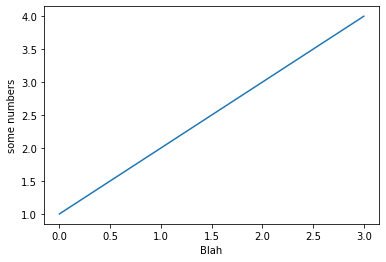

In [9]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.xlabel('Blah')
plt.ylabel('some numbers')
plt.show()

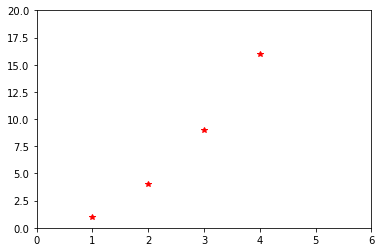

In [15]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r*')
plt.axis([0, 6, 0, 20])
plt.show()

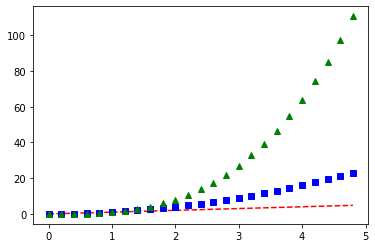

In [17]:
import numpy as np

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

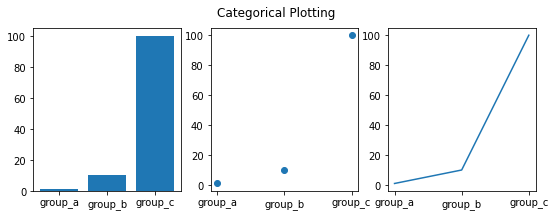

In [18]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

In [55]:
import numpy as np
from numpy import unravel_index
iou = np.random.randint(10, size=(64,1200,6))
print(iou.shape)

(64, 1200, 6)


In [56]:
top=3
TopFiveIOU = np.zeros([top,iou.shape[0]])
for u in range(iou.shape[0]):
    U_iou = iou[u,:,:]
    for t in range(top):
        idx =unravel_index(U_iou.argmax(), U_iou.shape)
        TopFiveIOU[t,u]=idx[1]
        U_iou[idx]=0

In [57]:
print(TopFiveIOU.shape)

(3, 64)
